<a href="https://colab.research.google.com/github/theTURYA/deep-learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definition for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


# Creating data to view and fit

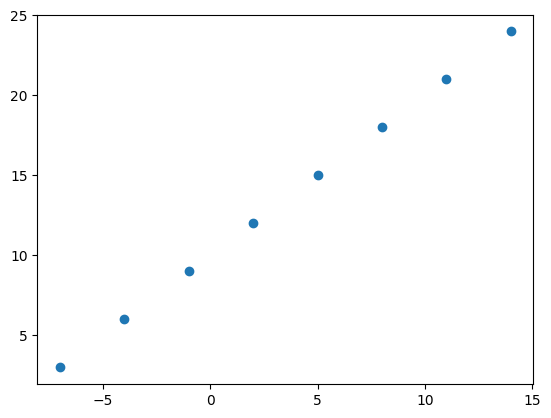

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0 ])

# Visualize
plt.scatter(X,y)

In [ ]:
y == X+ 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
#Turn our numpy array to tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

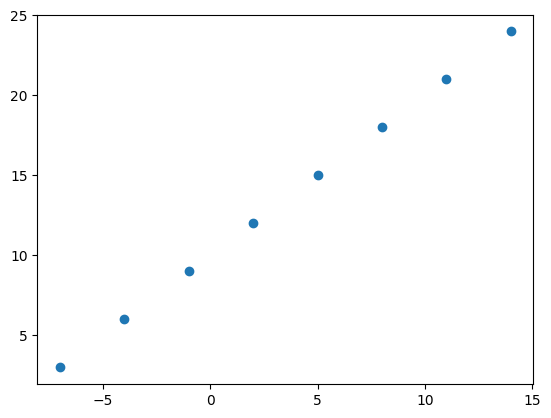

In [ ]:
plt.scatter(X,y)

# Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
# model.add(tf.keras.layers.Dense(4))


# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# ...

# model = tf.kears.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,   # mae : mean absolute error
              optimizer = tf.keras.optimizers.SGD(),   # SGD : stochastic gradient descent
              metrics = ["mae"])


# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - loss: 14.9684 - mae: 14.9684
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.8359 - mae: 14.8359
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.7034 - mae: 14.7034
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.5709 - mae: 14.5709
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.4384 - mae: 14.4384


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y_pred = model.predict(tf.constant([17.0]))  # Convert the list to a tensor
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[-4.107112]], dtype=float32)

# Improve our Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - loss: 20.6275 - mae: 20.6275
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 20.2952 - mae: 20.2952
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 20.0140 - mae: 20.0140
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 19.7327 - mae: 19.7327
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 19.4515 - mae: 19.4515
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 19.1702 - mae: 19.1702
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 18.8890 - mae: 18.8890
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 18.6077 - mae: 18.6077
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 18.3265 - mae: 18.3265
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 18.0452 - mae: 18.0452
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 17.7640 - mae: 17.7640
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 17.4827 - mae: 17.4827
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[29.40563]], dtype=float32)

### Let's see how we improve our model once again

1. Create the model (this time with an extra hidden layer with 100 hidden units)
2.

In [ ]:
# Let's see how we improve our model once again

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = "relu"),
     tf.keras.layers.Dense(1),
 ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step - loss: 14.0803 - mae: 14.0803
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 13.6911 - mae: 13.6911
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.3098 - mae: 13.3098
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.9609 - mae: 12.9609
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 12.6250 - mae: 12.6250
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.2874 - mae: 12.2874
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.9481 - mae: 11.9481
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.6026 - mae: 11.6026
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.2412 - mae: 11.2412
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.9171 - mae: 10.9171
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.5935 - mae: 10.5935
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.2508 - mae: 10.2508
Epoch 13/100
1/1 ━━━━━━

In [ ]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[31.450932]], dtype=float32)

In [ ]:
# Let's see how we improve our model once again

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = None),
     tf.keras.layers.Dense(1),
 ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.predict(tf.constant([17.0]))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step - loss: 14.2274 - mae: 14.2274
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.5682 - mae: 13.5682
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.9130 - mae: 12.9130
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.2605 - mae: 12.2605
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.6081 - mae: 11.6081
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.9526 - mae: 10.9526
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.2907 - mae: 10.2907
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 9.6193 - mae: 9.6193
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.9355 - mae: 8.9355
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.2360 - mae: 8.2360
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.5179 - mae: 7.5179
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 6.7782 - mae: 6.7782
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

array([[27.152922]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when a building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it....
```

When it comes to evaluation.... there are 3 words you shuld memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
 * The data : what data are we working with? What does it look lke?
 * The model itself : what does our model look like?
 * The training of a model : how does a model perform while it learns?
 * The prediction of the model : how do the predictions of a model line up against the ground truth (the oroginal labels?)


In [ ]:
# make a dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
Y = X+ 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

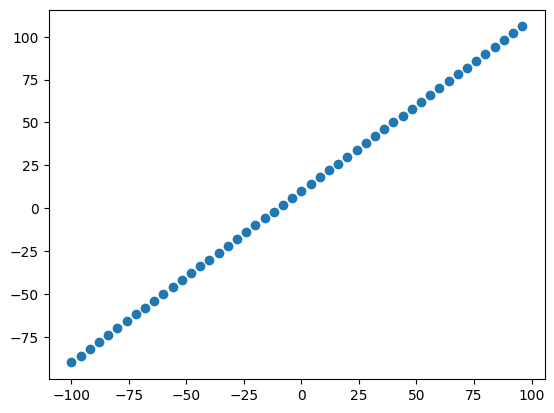

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### The 3 sets...

* **Training set** - the model learns from the data, which is typically 70-80% of the total data you have availbale.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of teh data availbal.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data is availbale.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Spilt the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of te data)
Y_train = Y[:40]
X_test = X[40:]  # last 10 are testing samples(20% of te data)
Y_test = Y[40:]
len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

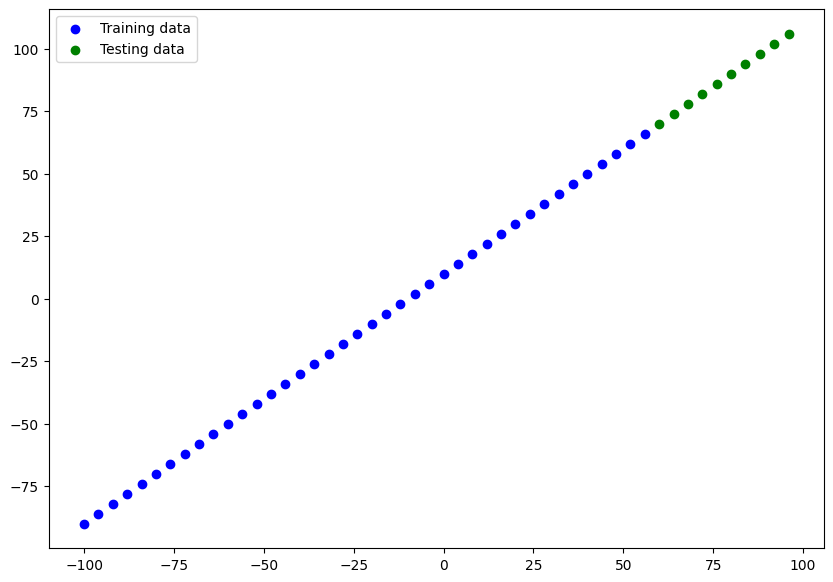

In [ ]:
plt.figure(figsize = (10,7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c = 'b', label = 'Training data') # Our model will learn on this
# Plot test data in blue
plt.scatter(X_test, Y_test, c = 'g', label = 'Testing data') # want our model to able to predict this (given X, what's Y?)
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build aneural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)
# model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 99.4221 - mae: 99.4221    
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64.2539 - mae: 64.2539 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.4995 - mae: 29.4995 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6087 - mae: 9.6087 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.1919 - mae: 11.1919 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.8136 - mae: 7.8136
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.6774 - mae: 11.6774 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6308 - mae: 8.6308 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.0996 - mae: 10.0996 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8230 - mae: 11.8230 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7406 - mae: 8.7406 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.2093 - mae: 10.2093 
Epoch 13/100
2/2 ━━━━━━━━━━━━━

# Visualize the model

In [ ]:
model.summary()

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_107 (Dense)                    │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name= "output_layer")
], name = "model_1")

# Compile the model (same as bove)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params: n total number of parameters in the model.
*Trainable parameters: these are the parameters (patterns) the model can update as it trains.
* Non-trainable params: these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).



In [ ]:
# Let's fit our mpdel to training data
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose = 0)

In [ ]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

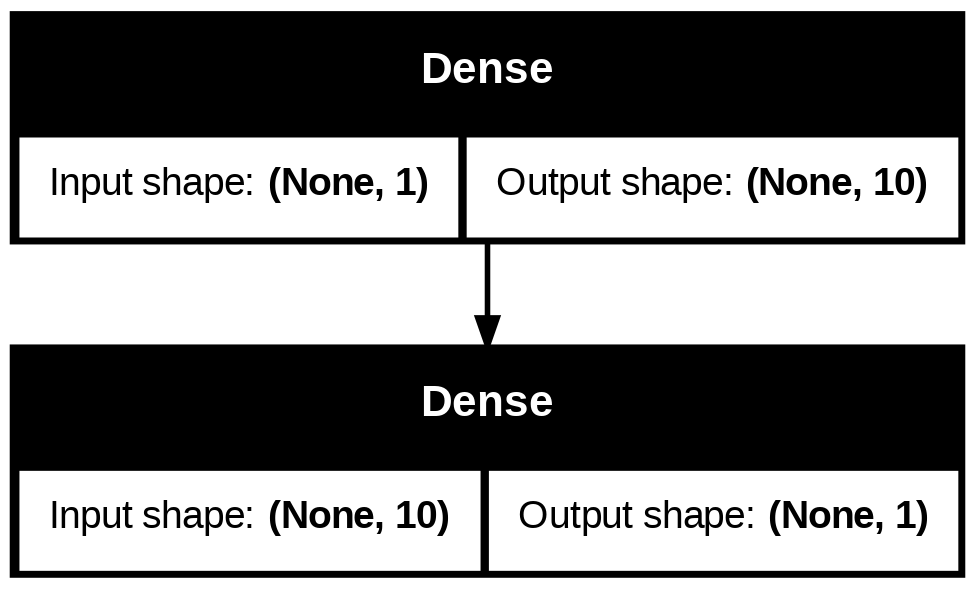

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it is a good idea to plot them against the ground truth labels.

Often you'll see this in the form of Y_test or Y_true versus Y_pred (ground truth versus your model's prediction)

In [ ]:
# Make some predictions
Y_pred = model.predict(X_test)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[41.728493],
       [44.401073],
       [47.073666],
       [49.746254],
       [52.418842],
       [55.09143 ],
       [57.76402 ],
       [60.43661 ],
       [63.109196],
       [65.78179 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
X_train, Y_train, X_test, Y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Let's create a plotting function

def plot_predictions(train_data = X_train, train_labels = Y_train,
                     test_data = X_test, test_labels = Y_test,
                     predictions = Y_pred):
## "Plots training data, test data and compares predictions to ground truth labels."

  plt.figure(figsize = (10,7))
# Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = 'Training data') # Our model will learn on this
# Plot test data in blue
  plt.scatter(test_data, test_labels, c = 'g', label = 'Testing data') # want our model to able to predict this (given X, what's Y?)
# Plot model's prediction in red
  plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
# Show the legend
  plt.legend();

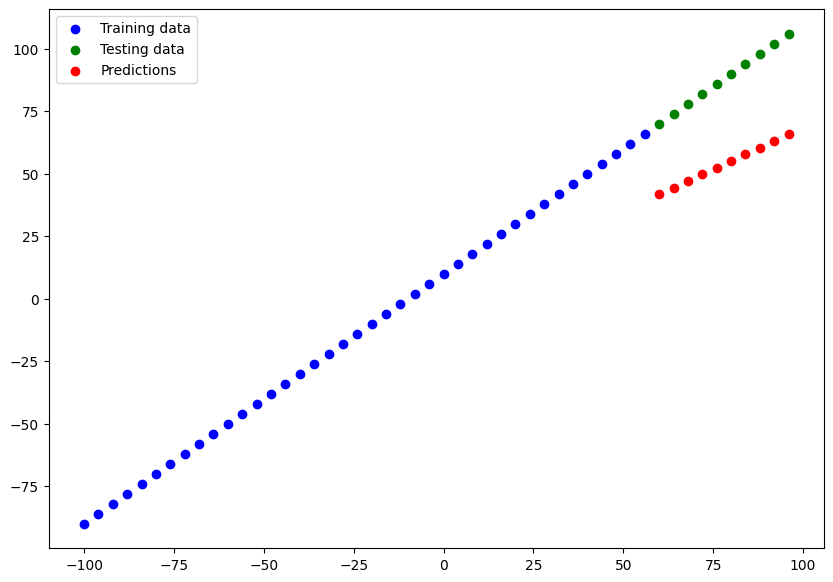

In [ ]:
plot_predictions()

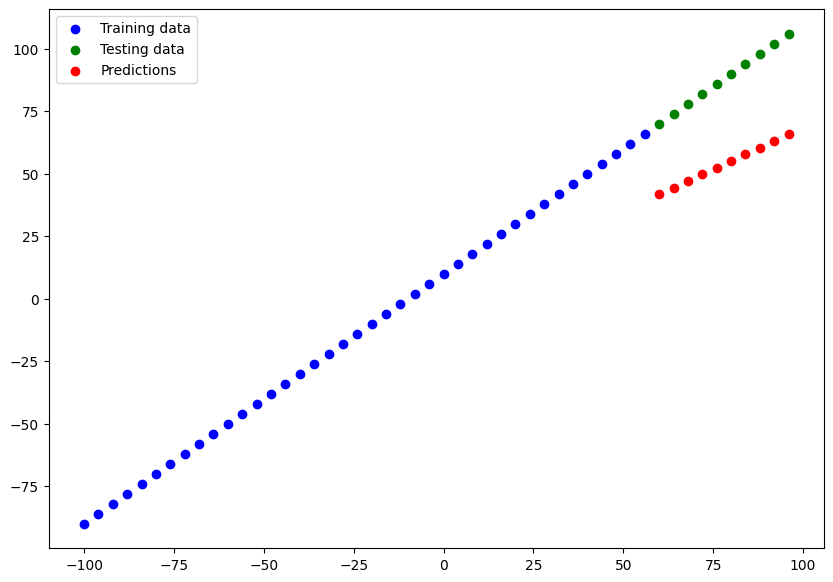

In [ ]:
plot_predictions(train_data = X_train, train_labels = Y_train,
                     test_data = X_test, test_labels = Y_test,
                     predictions = Y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on regression, two of the main metrics:

* **MAE:** mean absolute error, "on avearge, how wrong is each of my model's predictions". ``As a great starter metric for any regression problem.``
* **MSE:** mean square error, "square the average errors". ``When larger errors are more significant than smaller. ``

The another metric is : "Huber" -> Combination of MSE nad MAE , less sensitive to outliers than MSE.

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 34.2449 - mae: 34.2449


[34.2448616027832, 34.2448616027832]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.constant(Y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([28.271507, 29.598927, 30.926334, 32.253746, 33.581158, 34.90857 ,
       36.23598 , 37.56339 , 38.890804, 40.21821 ], dtype=float32)>

In [ ]:
tf.constant(Y_pred), Y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[41.728493],
        [44.401073],
        [47.073666],
        [49.746254],
        [52.418842],
        [55.09143 ],
        [57.76402 ],
        [60.43661 ],
        [63.109196],
        [65.78179 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
tf.squeeze(Y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([41.728493, 44.401073, 47.073666, 49.746254, 52.418842, 55.09143 ,
       57.76402 , 60.43661 , 63.109196, 65.78179 ], dtype=float32)>

In [ ]:
# Calculate the MAE
mae = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=34.24486>

In [ ]:
# Calculate the MSE
mae = tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(Y_pred))
mae



<tf.Tensor: shape=(), dtype=float32, numpy=1187.2472>

In [ ]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(Y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(Y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> evaluate it...

```

1. Get more data: get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model): this might come in the form of more lavers or more hidden units in each layer.
3. Train for longer: give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layersm trained for 500 epochs.

**Build `model_1`**


In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.9210 - mae: 16.9210 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6981 - mae: 11.6981 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8421 - mae: 7.8421 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8022 - mae: 10.8022 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6473 - mae: 7.6473 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9737 - mae: 11.9737 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1560 - mae: 8.1560 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7004 - mae: 8.7004 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5671 - mae: 8.5671 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3342 - mae: 8.3342 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0789 - mae: 9.0789 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1487 - mae: 8.1487 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


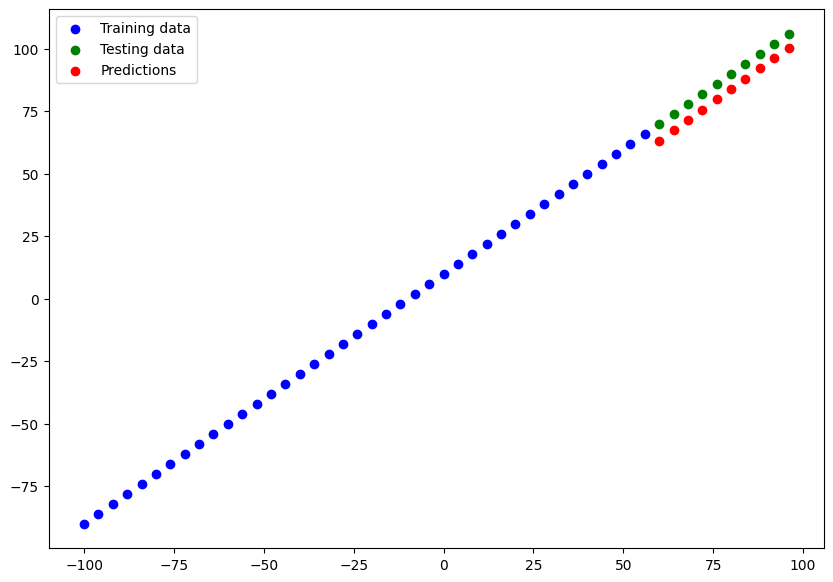

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
y_preds_1

array([[ 63.29397 ],
       [ 67.41861 ],
       [ 71.54325 ],
       [ 75.66789 ],
       [ 79.79253 ],
       [ 83.91717 ],
       [ 88.04181 ],
       [ 92.16644 ],
       [ 96.291084],
       [100.415726]], dtype=float32)

### Calculate model_1 evaluation metrics

In [ ]:
mae_1 = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(y_preds_1))
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=6.145152>

In [ ]:
mse_1 = tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(y_preds_1))
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=37.89106>

**Build** `model_2`

2 layers, 100 epochs


In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 29.4463 - mae: 29.4463 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.6000 - mae: 23.6000 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.1017 - mae: 22.1017 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.2795 - mae: 22.2795 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.3665 - mae: 14.3665 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.6678 - mae: 18.6678 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.2217 - mae: 13.2217 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.2215 - mae: 15.2215 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.0145 - mae: 16.0145 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.0379 - mae: 12.0379 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.0372 - mae: 15.0372
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.0915 - mae: 11.0915 
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


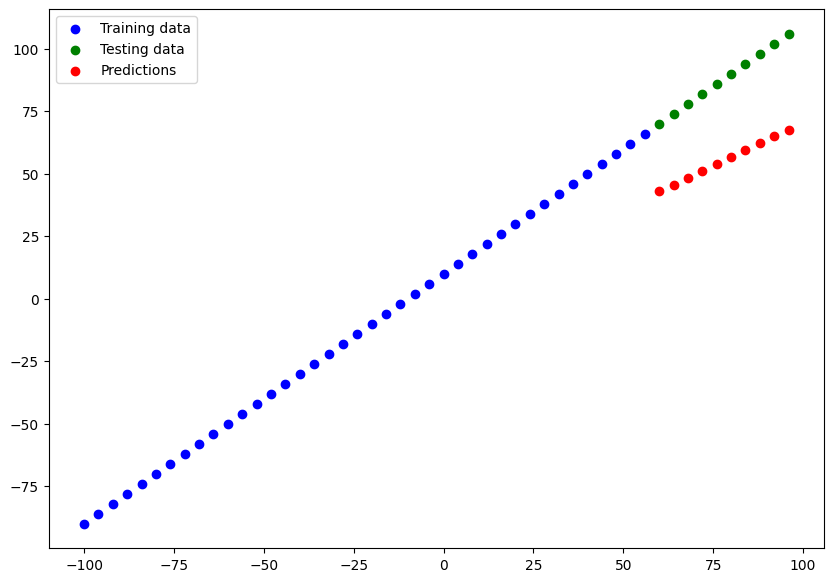

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(y_preds_2))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(y_preds_2))

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=32.710236>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1082.835>)

### Calculate model_2 evaluation metrics

In [ ]:
mae_2 = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(y_preds_2))
mae_2


<tf.Tensor: shape=(), dtype=float32, numpy=32.710236>

In [ ]:
mse_2 = tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(y_preds_2))
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=1082.835>

In [ ]:
model_2.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Build** `model_3`

2 layers, 500 epochs

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 22.1556 - mae: 22.1556 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.0954 - mae: 22.0954 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.6882 - mae: 13.6882 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.9073 - mae: 18.9073 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.2507 - mae: 13.2507 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.2143 - mae: 15.2143 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.9582 - mae: 15.9582 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9511 - mae: 11.9511 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.9323 - mae: 14.9323 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.9918 - mae: 10.9918
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8220 - mae: 14.8220 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.9471 - mae: 10.9471
Epoch 13/500
2/2 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


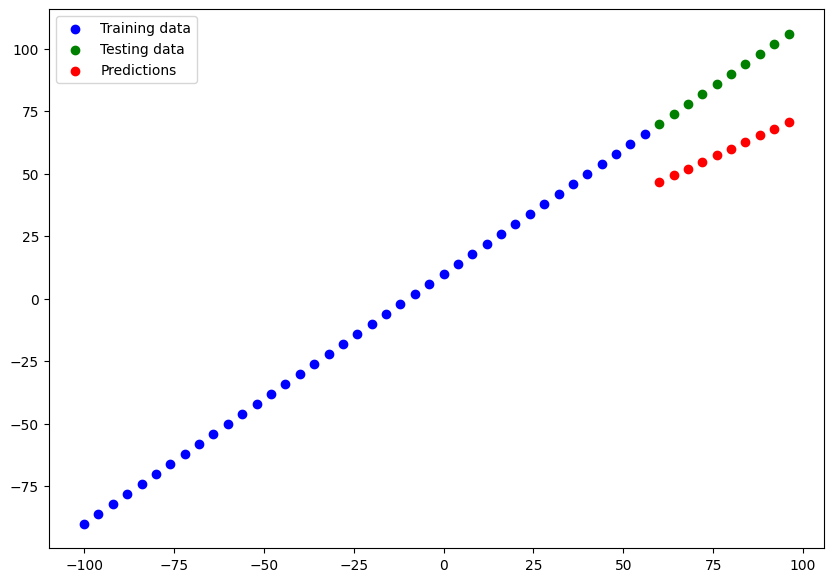

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

### Calculate model_3 evaluation metrics

In [ ]:
mae_3 = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(y_preds_3))
mae_3


<tf.Tensor: shape=(), dtype=float32, numpy=29.30964>

In [ ]:
mse_3 = tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(y_preds_3))
mse_3


<tf.Tensor: shape=(), dtype=float32, numpy=873.55945>

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame

import pandas as pd
model_results = [["model_1",mae_1.numpy(), mse_1.numpy()],
                 ["model_2",mae_2.numpy(), mse_2.numpy()],
                 ["model_3",mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,6.145152,37.891060
1,model_2,32.710236,1082.834961
2,model_3,29.309641,873.559448


Looks like `model_1` performs the best among all of the three models...

In [ ]:
model_2.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

🔑**Note:** One of our main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's moto: ``"experiment, experiment, experiment."``

## Tracking your experiments

One really good habit in machine learning modelling is to track the reasults of your experiments.

And when doing so, it can be tedious, if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resources:** As you build more models, you'll want to look into using:

* **TensorBoard:** a component of the TensorFlow library to help track modelling experiments.
* **Weights & Biases:** a tool for tracking all of kinds of machine learning experiments (plug straight into TensorBoard)



## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app.

There are two main formats we can save our model's to:
1. The SavedModel format
2. The HDF5 format

## Loading a save model

In [ ]:
!mkdir saved_models

mkdir: cannot create directory ‘saved_models’: File exists


`Save model using the SaveModel format`


In [ ]:
model_2.save("saved_models/best_model_SavedModel_format.keras")

In [ ]:
!ls saved_models/best_model_SavedModel_format.keras

saved_models/best_model_SavedModel_format.keras


`Save model using HDF5 format`

In [ ]:
model_2.save("saved_models/best_model_HDF5_format.h5")

## Loading in a save model

`Load in the SaveModel format model`

In [ ]:
load_SaveModel_format = tf.keras.models.load_model("saved_models/best_model_SavedModel_format.keras")
load_SaveModel_format.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Compare model_2 predictions with SaveModel format model prediction
model_2_preds = model_2.predict(X_test)
load_SaveModel_format_preds = load_SaveModel_format.predict(X_test)
model_2_preds == load_SaveModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Comapre the MAE of model_2_preds and loaded_Savemodel_format_preds
mae(y_true=Y_test, y_pred=model_2_preds) == mae(y_true=Y_test, y_pred=load_SaveModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
model_2_preds.squeeze()

array([42.911484, 45.662216, 48.41294 , 51.16367 , 53.914402, 56.66513 ,
       59.415855, 62.166595, 64.91732 , 67.66805 ], dtype=float32)

In [ ]:
load_SaveModel_format_preds.squeeze()

array([42.911484, 45.662216, 48.41294 , 51.16367 , 53.914402, 56.66513 ,
       59.415855, 62.166595, 64.91732 , 67.66805 ], dtype=float32)

In [ ]:
model_2_preds.squeeze() == load_SaveModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

`Load in a model using the .h5 format`

In [ ]:
load_h5_format = tf.keras.models.load_model("saved_models/best_model_HDF5_format.h5")
load_h5_format.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)                    │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
load_h5_format_preds = load_h5_format.predict(X_test)
model_2_preds == load_h5_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you wannt tpo download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Using code. (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying in there. (see 2nd code cell below)

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("saved_models/best_model_SavedModel_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)

!cp /content/saved_models/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [ ]:
!ls /content/drive/MyDrive/tensorflow_course

best_model_HDF5_format.h5


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance['sex'], insurance['age']

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Let's try one-hot encode our Dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=np.int32)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# Create training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.SGD(),
                         metrics = ["mae"])

# 3. Fit the model

insurance_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10243.9795 - mae: 10243.9795
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7743.9692 - mae: 7743.9692
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7943.2876 - mae: 7943.2876
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7845.0723 - mae: 7845.0723
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7593.7979 - mae: 7593.7979
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7356.4741 - mae: 7356.4741
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7673.0898 - mae: 7673.0898
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7666.9116 - mae: 7666.9116
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7454.6172 - mae: 7454.6172
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7586.9814 - mae: 7586.9814
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7294.7397 - mae: 7294.7397
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
# Check the results of the insurance model on the test data

insurance_model.evaluate(tf.expand_dims(X_test, axis=1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8105.0571 - mae: 8105.0571  


[8075.18017578125, 8075.18017578125]

In [ ]:
y_train.median(), y_train.mean(),

(9575.4421, 13346.089736364485)

### Right now it looks like our model isn't performing too well.... let's try and improve it

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)

In [ ]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

# 3. Fit the model

insurance_model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13263.9844 - mae: 13263.9844
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13096.5732 - mae: 13096.5732
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12766.7559 - mae: 12766.7559
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12116.0869 - mae: 12116.0869
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11009.1621 - mae: 11009.1621
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9566.6699 - mae: 9566.6699
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8196.8105 - mae: 8196.8105
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7497.1509 - mae: 7497.1509
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7389.7402 - mae: 7389.7402
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7363.3999 - mae: 7363.3999
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7340.9072 - mae: 7340.9072
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# Evaluate our second model
insurance_model_2.evaluate(tf.expand_dims(X_test, axis=1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4670.8525 - mae: 4670.8525  


[4548.82958984375, 4548.82958984375]

In [ ]:
insurance_model.evaluate(tf.expand_dims(X_test, axis=1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8105.0571 - mae: 8105.0571 


[8075.18017578125, 8075.18017578125]

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

# 3. Fit the model

history = insurance_model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13257.5322 - mae: 13257.5322
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13096.4902 - mae: 13096.4902
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12776.5586 - mae: 12776.5586
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12140.2148 - mae: 12140.2148
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11058.4434 - mae: 11058.4434
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9639.9316 - mae: 9639.9316
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8277.7646 - mae: 8277.7646
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7530.6870 - mae: 7530.6870
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7404.5347 - mae: 7404.5347
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7376.7256 - mae: 7376.7256
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7355.2495 - mae: 7355.2495
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(tf.expand_dims(X_test, axis=1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3472.0652 - mae: 3472.0652  


[3404.254638671875, 3404.254638671875]

Text(0.5, 0, 'epochs')

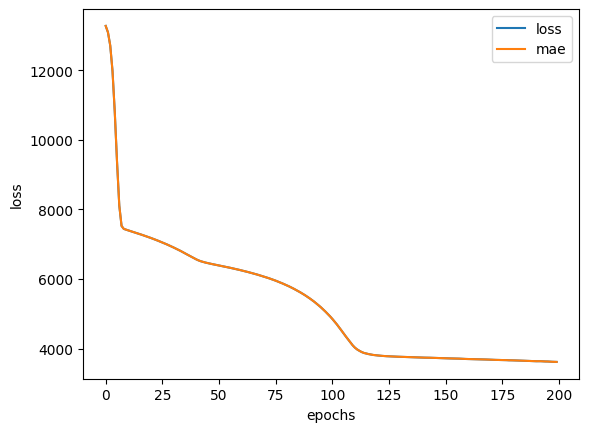

In [ ]:
# Plot history (also known as a loss curve or training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should we train for?

It depends. Really... it depends on the problem we're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback
 --> (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) , which is a TensorFlow component we can add to our model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

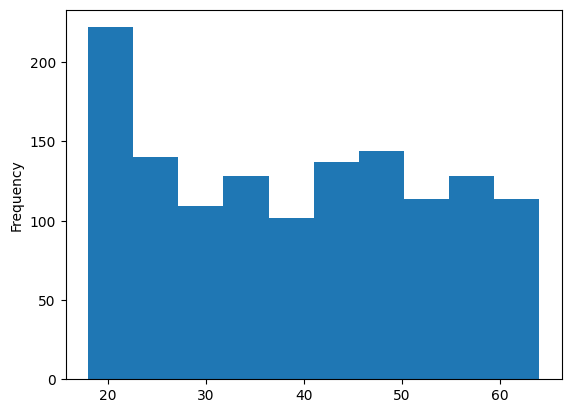

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

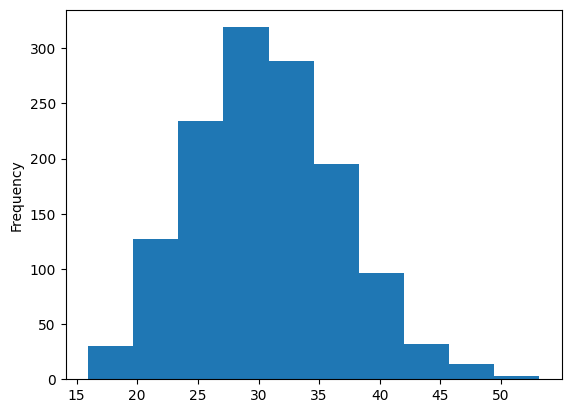

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


### To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore" ), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state = 42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [ ]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=1), y_train, epochs=100, verbose = 1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13297.9209 - mae: 13297.9209
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13292.3428 - mae: 13292.3428
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13277.5303 - mae: 13277.5303
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13243.3359 - mae: 13243.3359
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13178.2432 - mae: 13178.2432
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13071.0879 - mae: 13071.0879
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12911.1182 - mae: 12911.1182
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12688.0977 - mae: 12688.0977
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12392.1279 - mae: 12392.1279
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12014.7676 - mae: 12014.7676
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11562.0459 - mae: 11562.0459
Epoch 12/100
34/34 ━━━━━━━━━━━

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(tf.expand_dims(X_test_normal, axis=1), y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3513.4653 - mae: 3513.4653  


[3428.04296875, 3428.04296875]

In [ ]:
# Insurance model_2 resulys
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4670.8525 - mae: 4670.8525  [4548.82958984375, 4548.82958984375]